**Project Title  - Football Teams Market Value Prediction:**

Group Number: **42**


Team member 1: **Wijegurusinge O.W.D.K.M. - EG/2021/4890**

Team member 2: **Bandara A.W.M.L.M. - EG/2021/4426**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Data Collection

import pandas as pd

# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/My Drive/ML project/Football_teams_price_data.csv')

# Display the first few rows of the dataset
data.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,...,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,...,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,"4,375,181,628"
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,...,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,"859,750,388"
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,...,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,"2,168,913,729"
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,...,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,"1,426,481,894"
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,...,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,"4,038,110,631"


In [ ]:
# Print the size of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 50000 rows and 26 columns.


In [ ]:
# Print initial dataset info
print("Initial Dataset Info:")
data.info()

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AveragePlayerAge              50000 non-null  float64
 1   TotalGoalsLastSeason          50000 non-null  int64  
 2   MatchesWonLastSeason          50000 non-null  int64  
 3   MatchesDrawnLastSeason        50000 non-null  int64  
 4   MatchesLostLastSeason         50000 non-null  int64  
 5   TotalGoalsConcededLastSeason  50000 non-null  int64  
 6   TotalRevenueLastSeason        50000 non-null  float64
 7   StadiumCapacity               50000 non-null  int64  
 8   AverageAttendance             50000 non-null  float64
 9   TransferSpendingLastSeason    50000 non-null  float64
 10  TransferIncomeLastSeason      50000 non-null  float64
 11  NumberOfTrophies              50000 non-null  int64  
 12  MarketValueOfSquad            50000 no

In [ ]:
def clean_data(data):

    # Remove commas from numeric columns like 'Price'
    if 'Price' in data.columns:
        data['Price'] = data['Price'].replace({',': ''}, regex=True).astype(float)

    # Print categorical columns for verification
    categorical_columns = data.select_dtypes(include=['object']).columns
    print("Categorical columns:", categorical_columns.tolist())

    return data


# Clean the dataset
data = clean_data(data)

# Print cleaned dataset info
print("Cleaned Dataset Info:")
data.info()

Categorical columns: ['League', 'Country', 'Manager', 'TeamFormation', 'PlayingStyle', 'HomeCity', 'StadiumType', 'MainSponsor', 'KitManufacturer', 'OwnershipType']
Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AveragePlayerAge              50000 non-null  float64
 1   TotalGoalsLastSeason          50000 non-null  int64  
 2   MatchesWonLastSeason          50000 non-null  int64  
 3   MatchesDrawnLastSeason        50000 non-null  int64  
 4   MatchesLostLastSeason         50000 non-null  int64  
 5   TotalGoalsConcededLastSeason  50000 non-null  int64  
 6   TotalRevenueLastSeason        50000 non-null  float64
 7   StadiumCapacity               50000 non-null  int64  
 8   AverageAttendance             50000 non-null  float64
 9   TransferSpendingLastSeason    50000 non-null  floa

In [ ]:
# Print the first 5 rows to verify the content
data.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,...,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,...,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,4.375182e+09
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,...,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,8.597504e+08
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,...,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,2.168914e+09
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,...,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,1.426482e+09
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,...,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,4.038111e+09


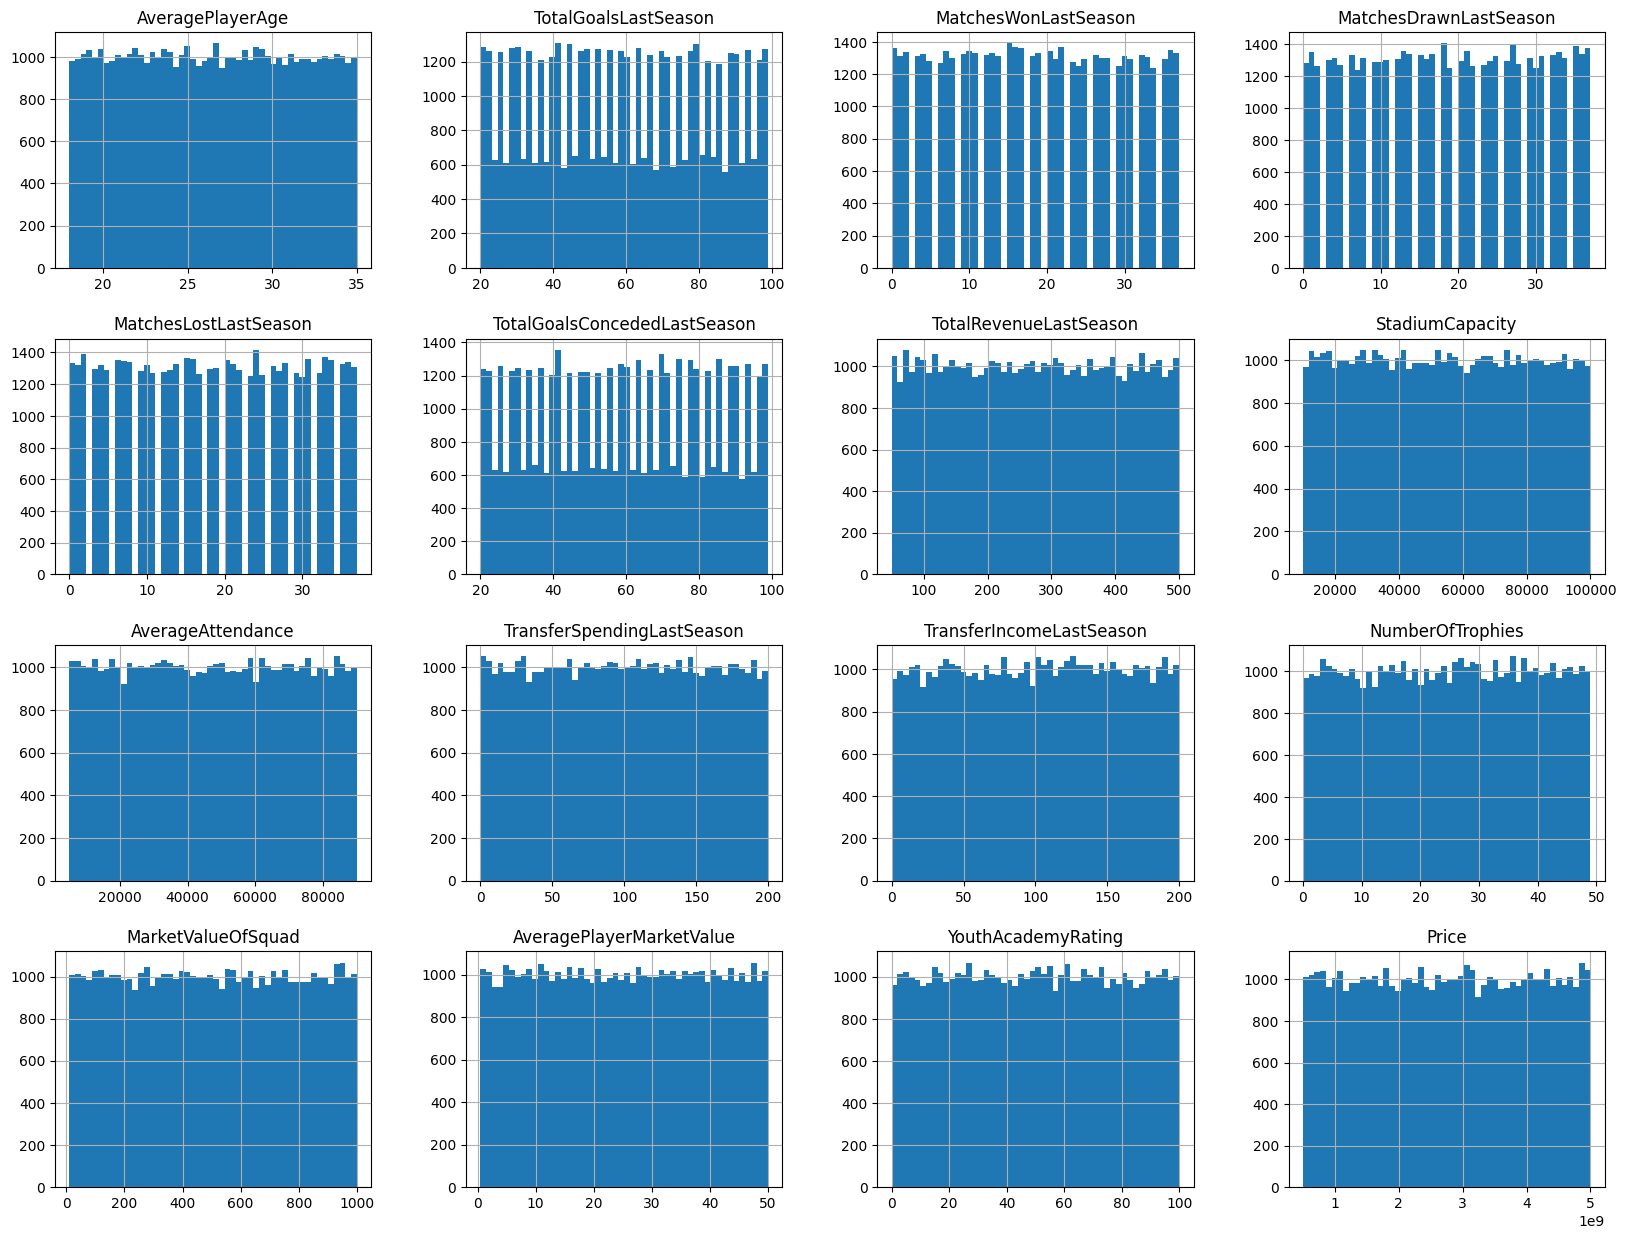

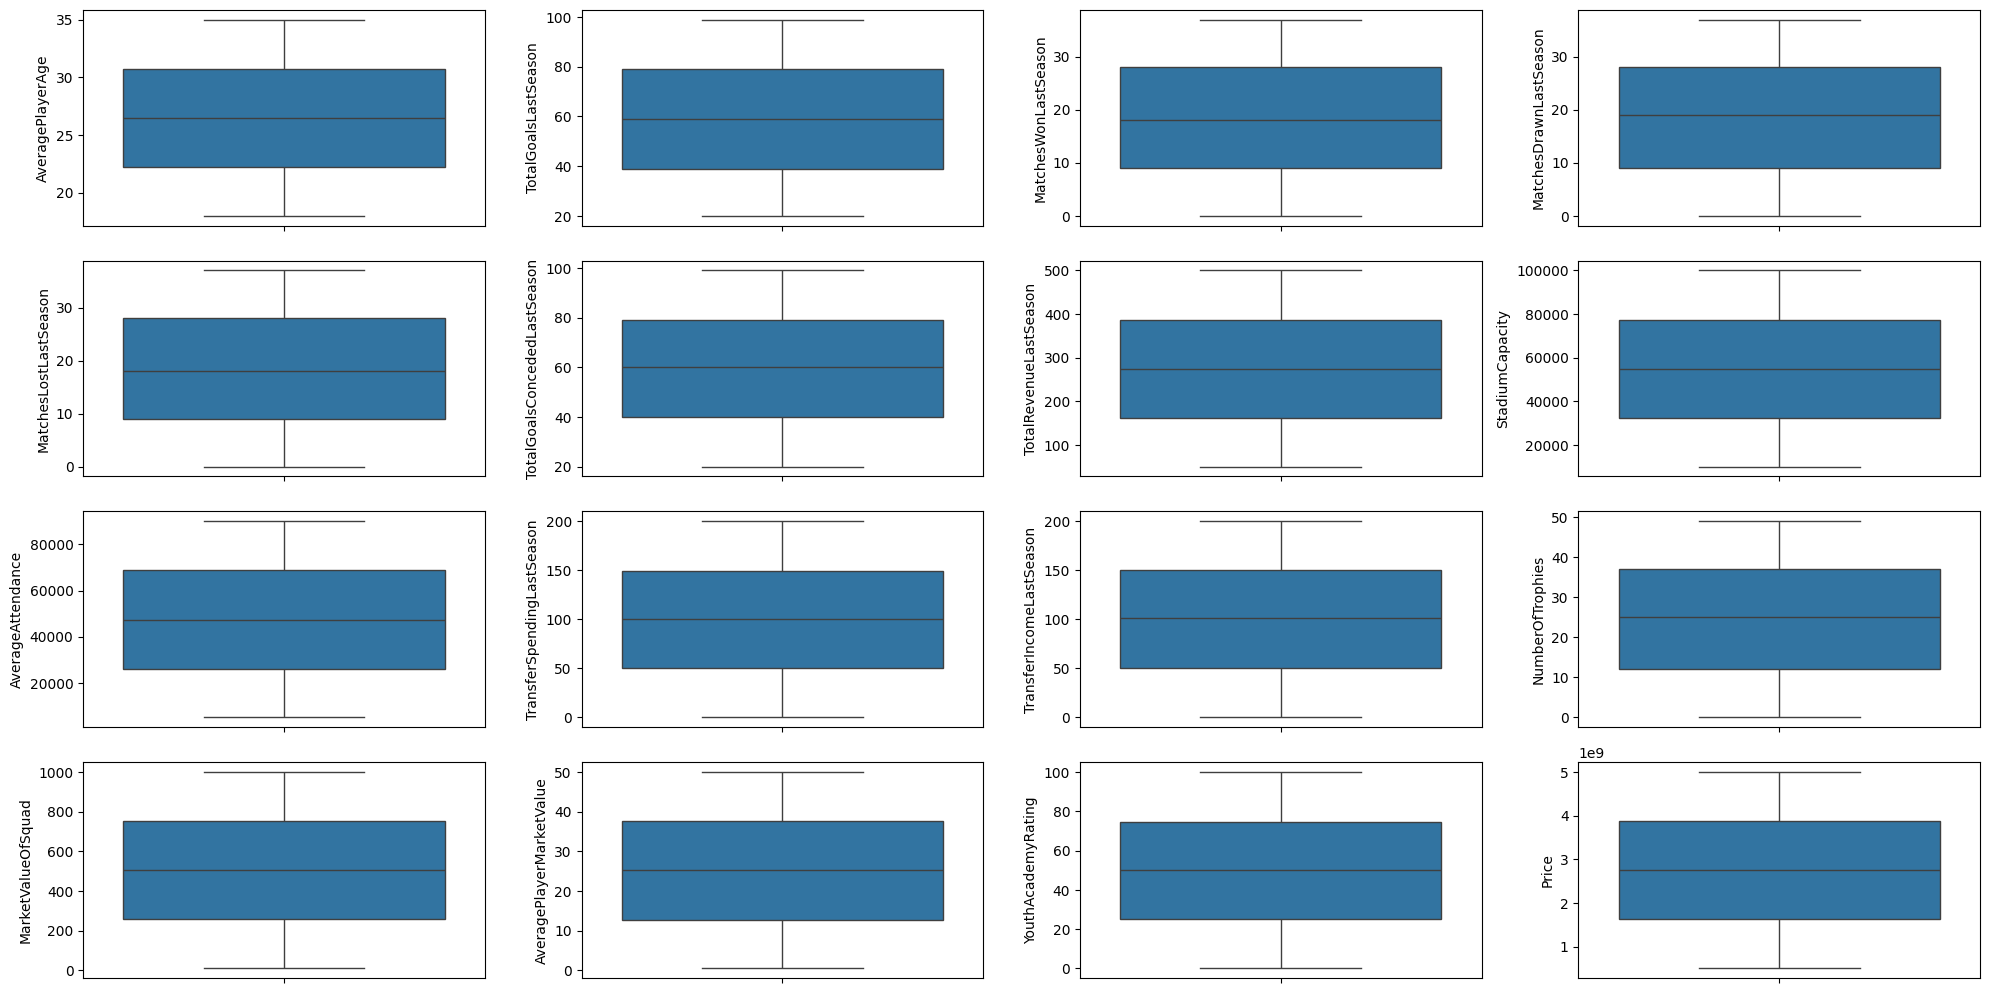

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
# This will plot histograms for all numerical columns in the DataFrame `data`
data.hist(figsize=(20, 15), bins=50)
plt.show()

# Boxplots
# detect outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data[column])
plt.tight_layout()
plt.show()


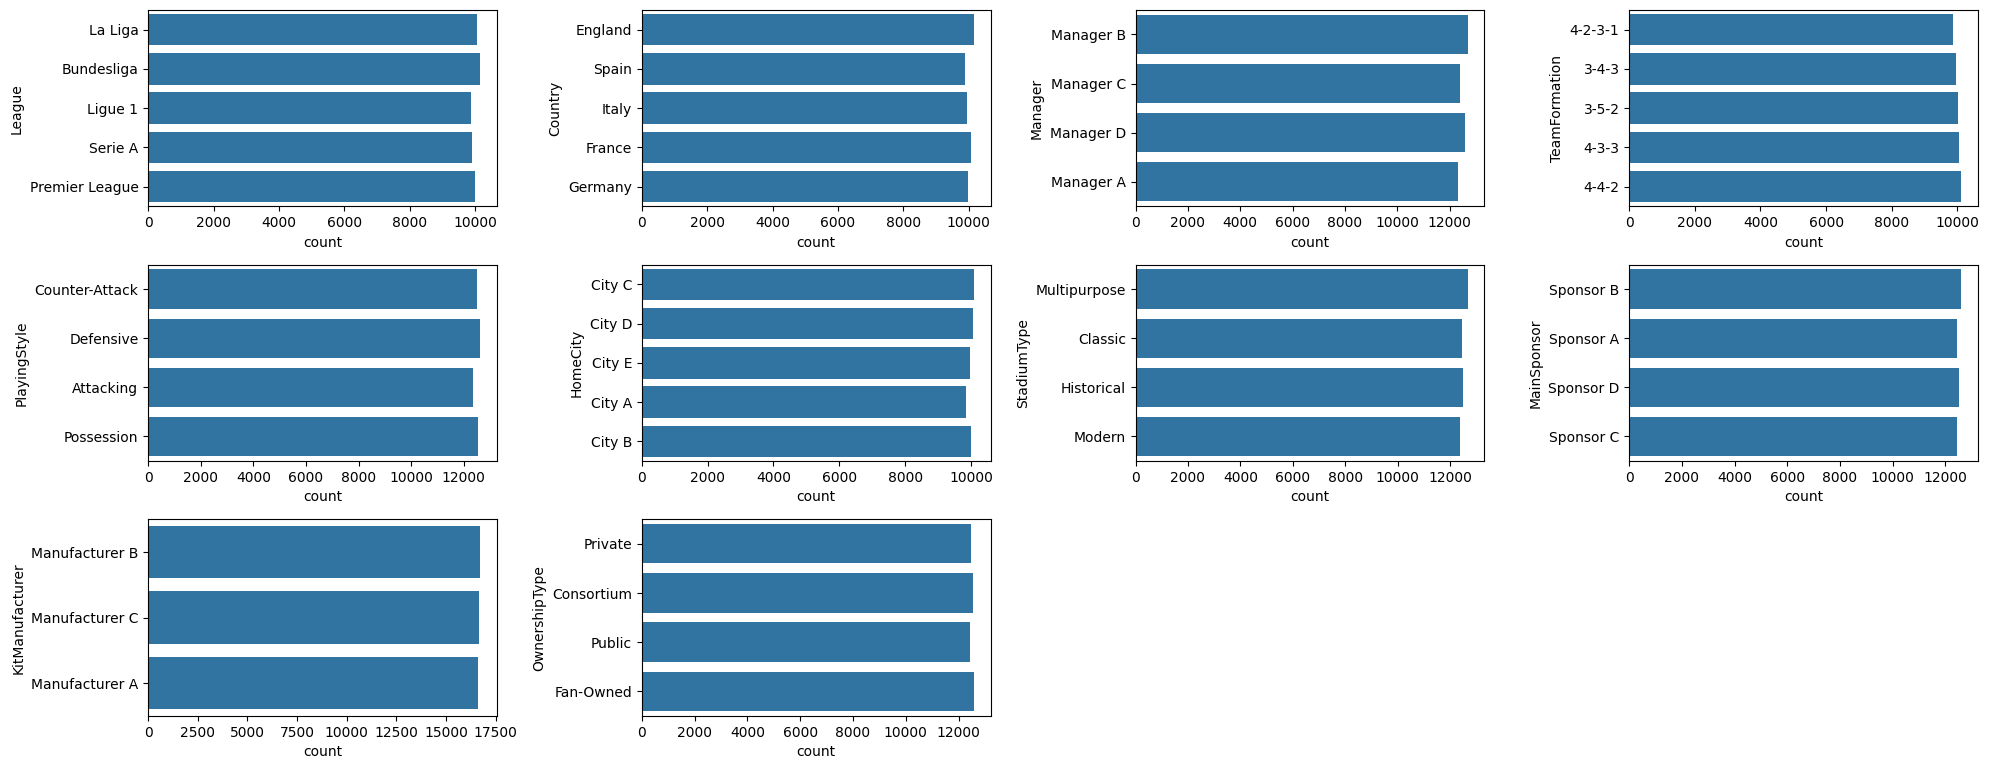

In [ ]:
# Categorical features
# Generate countplots for all categorical columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(data.select_dtypes(include=['object']).columns):
    plt.subplot(6, 4, i + 1)
    sns.countplot(y=data[column])

# Adjust spacing between subplots to prevent overlap
plt.tight_layout()
plt.show()


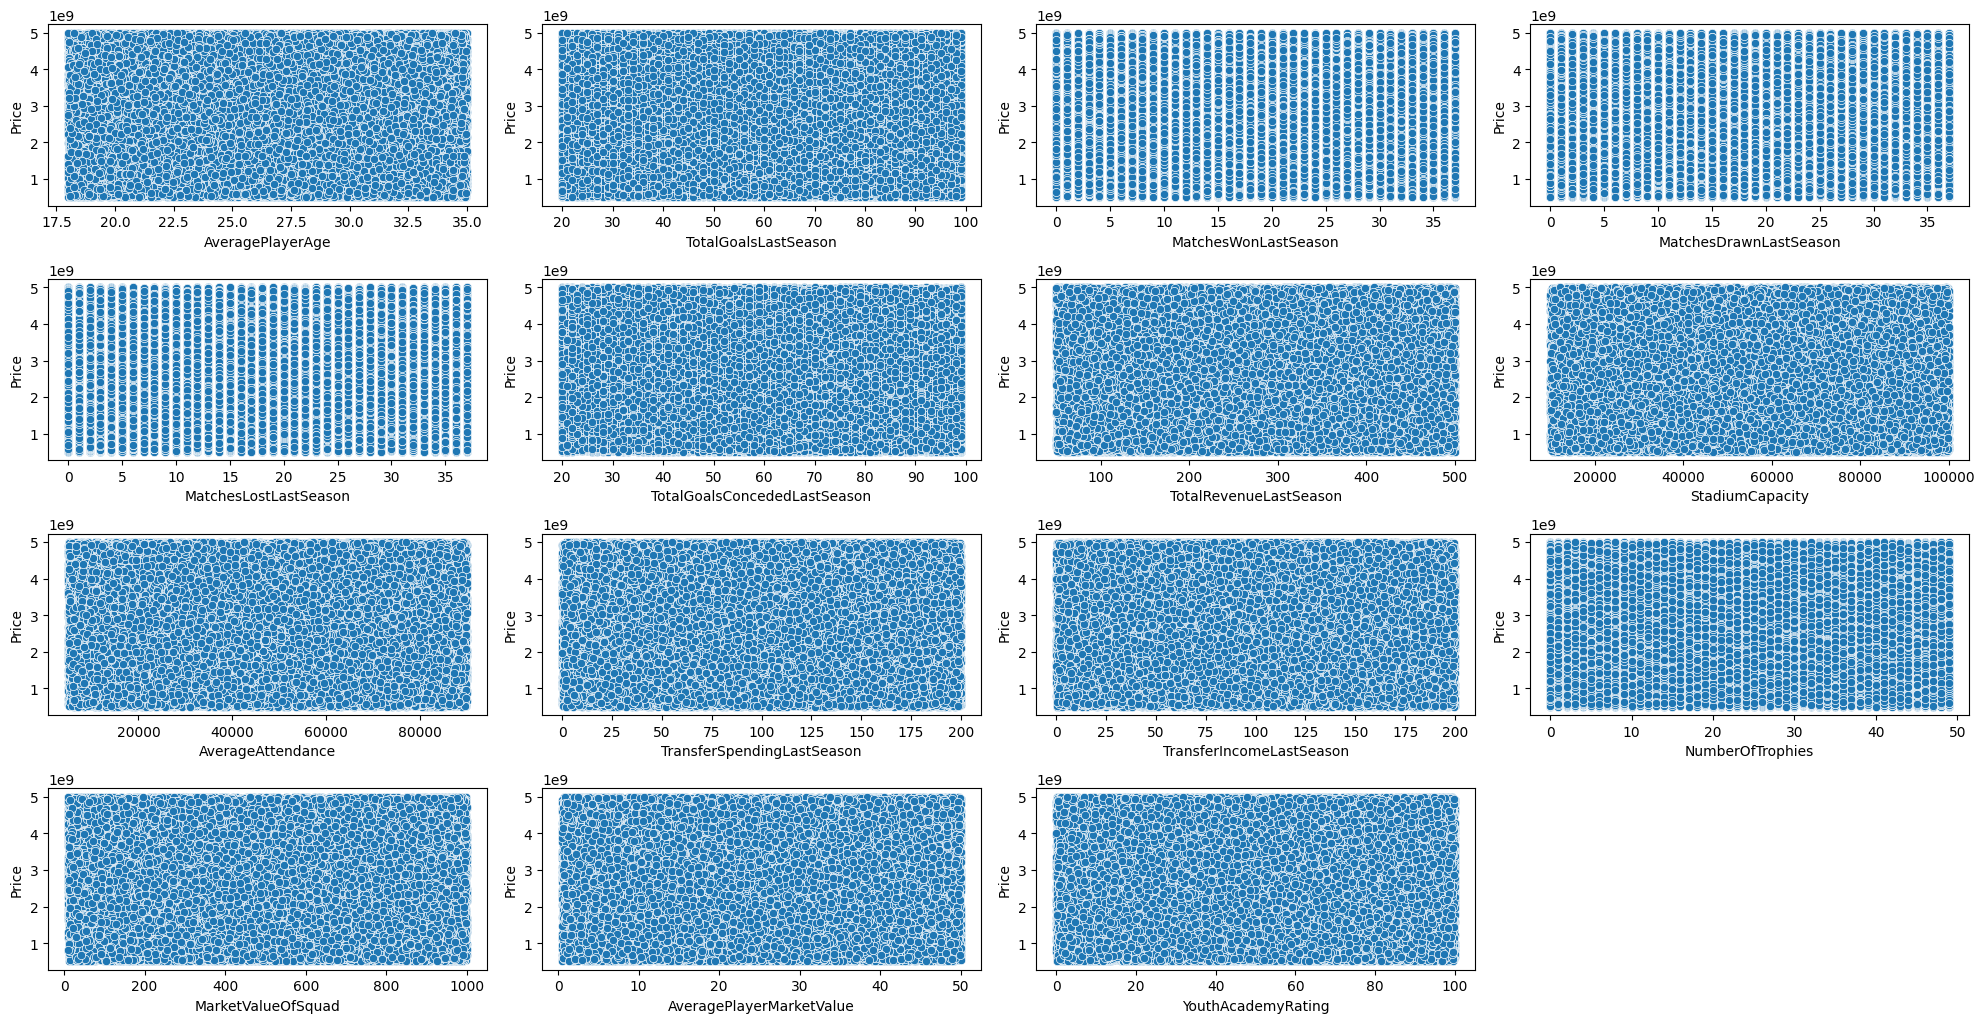

In [ ]:
# Scatterplots for numerical features vs target variable

target = 'Price'

plt.figure(figsize=(20, 15))

# Iterate through all numerical columns in the DataFrame `data`
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    if column != target:
        plt.subplot(6, 4, i + 1)
        sns.scatterplot(data=data, x=column, y=target)

# Adjust the layout to avoid overlapping plots
plt.tight_layout()
plt.show()


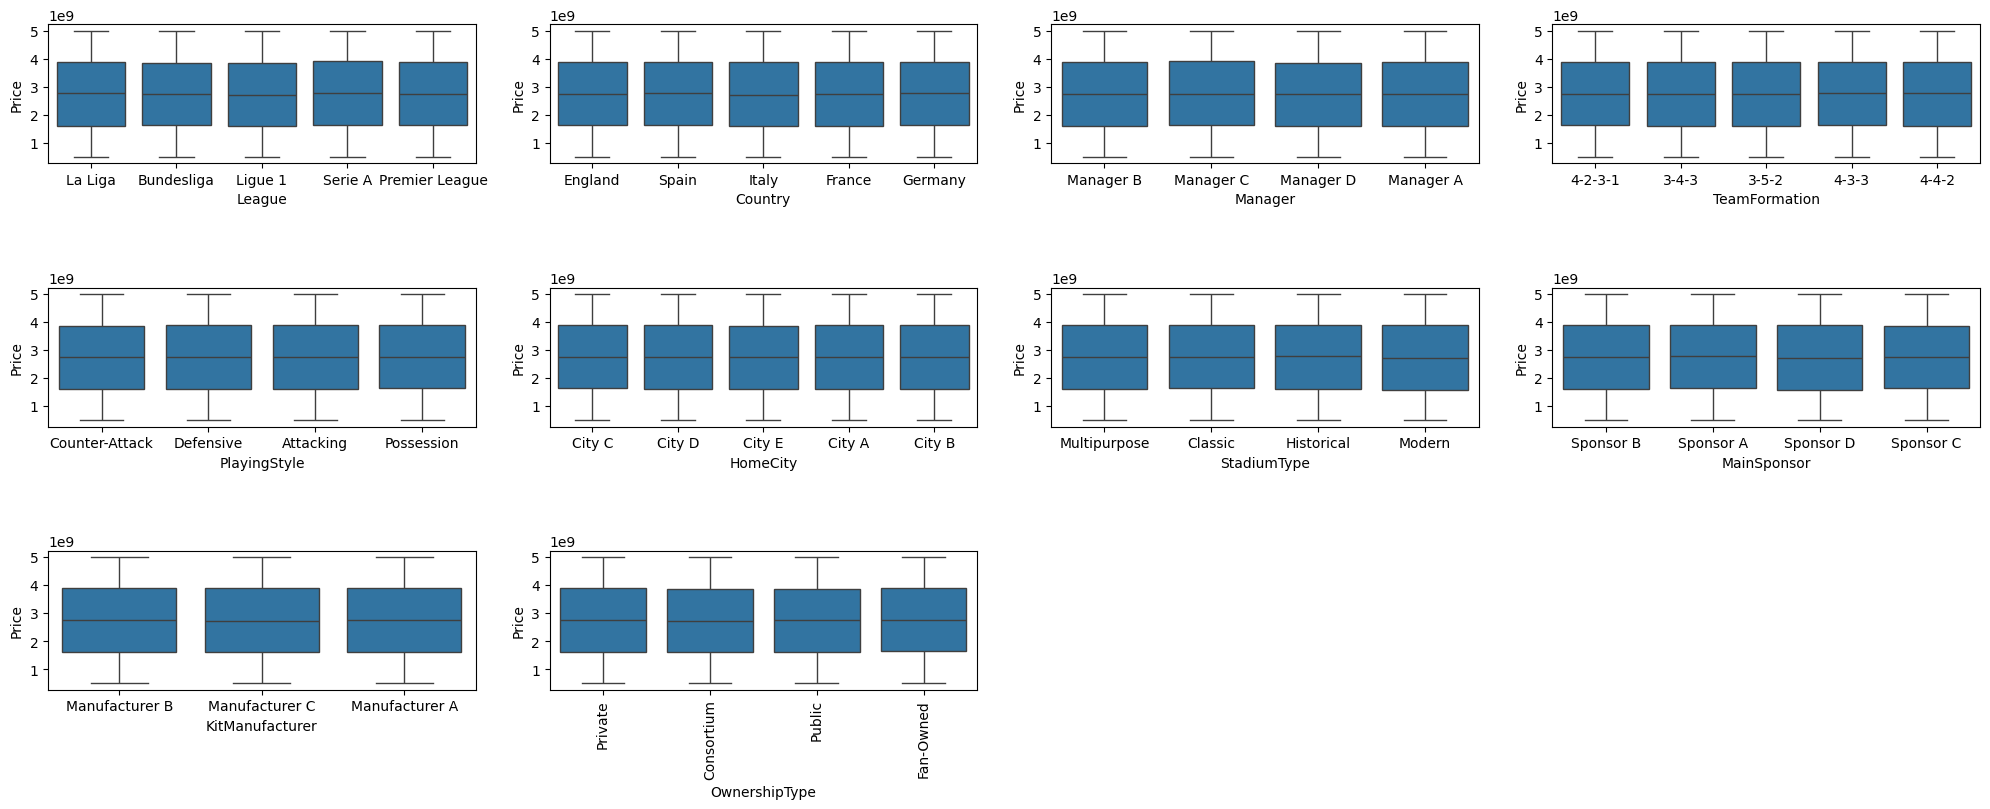

In [ ]:
# Boxplots for categorical features vs target variable

target = 'Price'

plt.figure(figsize=(20, 15))

# Iterate through all categorical columns in the DataFrame `data`
for i, column in enumerate(data.select_dtypes(include=['object']).columns):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=data, x=column, y=target)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()

plt.show()


In [ ]:
## Data Preprocessing Techniques

# Step 1: Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_sample_weight

In [ ]:
# Displaying initial information about the dataset
print("Initial Dataset Info:")
data.info()

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AveragePlayerAge              50000 non-null  float64
 1   TotalGoalsLastSeason          50000 non-null  int64  
 2   MatchesWonLastSeason          50000 non-null  int64  
 3   MatchesDrawnLastSeason        50000 non-null  int64  
 4   MatchesLostLastSeason         50000 non-null  int64  
 5   TotalGoalsConcededLastSeason  50000 non-null  int64  
 6   TotalRevenueLastSeason        50000 non-null  float64
 7   StadiumCapacity               50000 non-null  int64  
 8   AverageAttendance             50000 non-null  float64
 9   TransferSpendingLastSeason    50000 non-null  float64
 10  TransferIncomeLastSeason      50000 non-null  float64
 11  NumberOfTrophies              50000 non-null  int64  
 12  MarketValueOfSquad            50000 no

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,...,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,...,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,4.375182e+09
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,...,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,8.597504e+08
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,...,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,2.168914e+09
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,...,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,1.426482e+09
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,...,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,4.038111e+09


In [ ]:
# Step 2: Handling Null/Missing Values

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values in each column:\n", missing_values)


Missing Values in each column:
 AveragePlayerAge                0
TotalGoalsLastSeason            0
MatchesWonLastSeason            0
MatchesDrawnLastSeason          0
MatchesLostLastSeason           0
TotalGoalsConcededLastSeason    0
TotalRevenueLastSeason          0
StadiumCapacity                 0
AverageAttendance               0
TransferSpendingLastSeason      0
TransferIncomeLastSeason        0
NumberOfTrophies                0
MarketValueOfSquad              0
AveragePlayerMarketValue        0
YouthAcademyRating              0
League                          0
Country                         0
Manager                         0
TeamFormation                   0
PlayingStyle                    0
HomeCity                        0
StadiumType                     0
MainSponsor                     0
KitManufacturer                 0
OwnershipType                   0
Price                           0
dtype: int64


In [ ]:
# Handle missing values for numerical columns (using median)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Handle missing values for categorical columns (using mode)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [ ]:
# Verify that there are no more missing values
missing_values_after = data.isnull().sum()
print("\nMissing Values after imputation:\n", missing_values_after)


Missing Values after imputation:
 AveragePlayerAge                0
TotalGoalsLastSeason            0
MatchesWonLastSeason            0
MatchesDrawnLastSeason          0
MatchesLostLastSeason           0
TotalGoalsConcededLastSeason    0
TotalRevenueLastSeason          0
StadiumCapacity                 0
AverageAttendance               0
TransferSpendingLastSeason      0
TransferIncomeLastSeason        0
NumberOfTrophies                0
MarketValueOfSquad              0
AveragePlayerMarketValue        0
YouthAcademyRating              0
League                          0
Country                         0
Manager                         0
TeamFormation                   0
PlayingStyle                    0
HomeCity                        0
StadiumType                     0
MainSponsor                     0
KitManufacturer                 0
OwnershipType                   0
Price                           0
dtype: int64


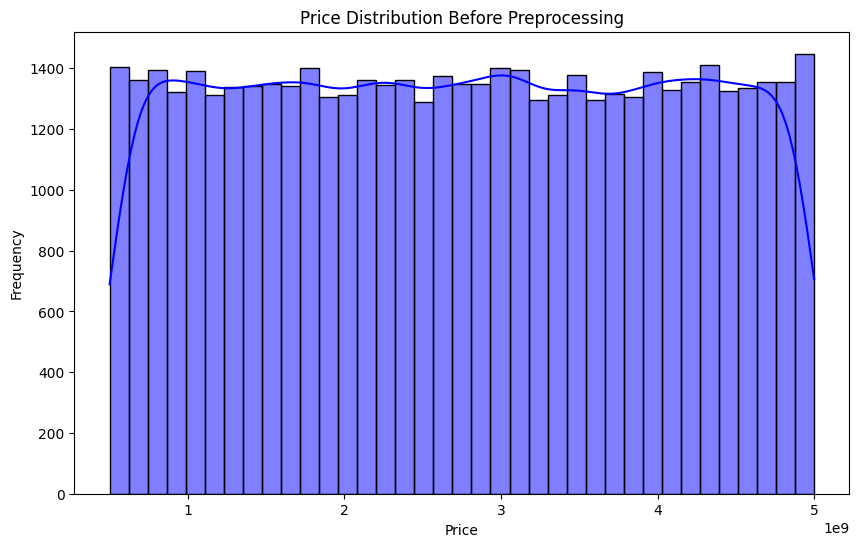

In [ ]:
# Visualize the target distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Price Distribution Before Preprocessing')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Step 3: Handling Duplicates
# Remove duplicate records based on all columns
data_no_duplicates = data.drop_duplicates()

# Verify that duplicates are removed
print("Shape of dataset after removing duplicates:", data_no_duplicates.shape)

Shape of dataset after removing duplicates: (50000, 26)


In [ ]:
# Step 3: Encoding Categorical Variables


# Label Encoding for ordinal categorical variables
label_encoder = LabelEncoder()

# Encoding 'OwnershipType' using Label Encoding (OwnershipType has a specific order)
if 'OwnershipType' in categorical_columns:
    data_no_duplicates['OwnershipType'] = label_encoder.fit_transform(data_no_duplicates['OwnershipType'])

# One-Hot Encoding for nominal categorical variables
# We use ColumnTransformer to apply OneHotEncoder for categorical columns except 'OwnershipType'
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop=None), categorical_columns)
    ],
    remainder='passthrough'  # Leave non-categorical columns unchanged
)

# Apply the encoding transformations
data_encoded_array = column_transformer.fit_transform(data_no_duplicates)

# Convert the encoded data back to a DataFrame
# The resulting matrix has more columns due to OneHotEncoding
encoded_column_names = column_transformer.get_feature_names_out()
data_encoded = pd.DataFrame(data_encoded_array, columns=encoded_column_names)

# Let's check the first few rows of the encoded data
data_encoded.head()

,cat__League_Bundesliga,cat__League_La Liga,cat__League_Ligue 1,cat__League_Premier League,cat__League_Serie A,cat__Country_England,cat__Country_France,cat__Country_Germany,cat__Country_Italy,cat__Country_Spain,...,remainder__TotalRevenueLastSeason,remainder__StadiumCapacity,remainder__AverageAttendance,remainder__TransferSpendingLastSeason,remainder__TransferIncomeLastSeason,remainder__NumberOfTrophies,remainder__MarketValueOfSquad,remainder__AveragePlayerMarketValue,remainder__YouthAcademyRating,remainder__Price
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,337.552001,55766.0,5229.742720,177.592126,79.972750,49.0,713.968872,15.847841,14.361253,4.375182e+09
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,264.850402,15307.0,46172.738882,125.441952,7.679349,38.0,236.644694,26.731697,23.967076,8.597504e+08
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,363.423205,77050.0,78334.254989,43.776137,136.648762,38.0,410.502058,21.365171,64.309831,2.168914e+09
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,296.719959,61440.0,60080.423819,183.936395,168.683160,6.0,177.561791,21.483504,82.352127,1.426482e+09
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,480.928532,78563.0,10940.950513,14.881518,188.768072,11.0,562.114099,26.938414,90.614463,4.038111e+09


In [ ]:
# Rename columns to remove the "remainder__" prefix from numerical columns
data_encoded.columns = [col.replace('remainder__', '') for col in data_encoded.columns]

# Check the transformed DataFrame without the "remainder__" prefix
data_encoded.head()

,cat__League_Bundesliga,cat__League_La Liga,cat__League_Ligue 1,cat__League_Premier League,cat__League_Serie A,cat__Country_England,cat__Country_France,cat__Country_Germany,cat__Country_Italy,cat__Country_Spain,...,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,Price
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,337.552001,55766.0,5229.742720,177.592126,79.972750,49.0,713.968872,15.847841,14.361253,4.375182e+09
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,264.850402,15307.0,46172.738882,125.441952,7.679349,38.0,236.644694,26.731697,23.967076,8.597504e+08
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,363.423205,77050.0,78334.254989,43.776137,136.648762,38.0,410.502058,21.365171,64.309831,2.168914e+09
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,296.719959,61440.0,60080.423819,183.936395,168.683160,6.0,177.561791,21.483504,82.352127,1.426482e+09
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,480.928532,78563.0,10940.950513,14.881518,188.768072,11.0,562.114099,26.938414,90.614463,4.038111e+09


In [ ]:
# Step 4: Treating Outliers -> Capping method

# Selecting categorical columns (either encoded or original ones)
categorical_features = data_encoded[[col for col in data_encoded.columns if 'cat__' in col]]

# Dropping categorical columns (either encoded or original ones)
numerical_features = data_encoded.drop(columns=[col for col in data_encoded.columns if 'cat__' in col])


def cap_outliers(numerical_features, columns):
    for col in columns:
        Q1 = numerical_features[col].quantile(0.25)
        Q3 = numerical_features[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers: set values below the lower bound to the lower bound, and above the upper bound to the upper bound
        numerical_features[col] = numerical_features[col].clip(lower=lower_bound, upper=upper_bound)
    return numerical_features

# Identify numerical columns to check for outliers
numerical_columns = numerical_features.select_dtypes(include=['float64', 'int64']).columns

# Cap outliers in numerical columns only
data_capped = cap_outliers(numerical_features.copy(), numerical_columns)  # Using copy() to avoid modifying original


In [ ]:
# Verify the shape after capping outliers
print("Shape of dataset after capping outliers:", data_capped.shape)


Shape of dataset after capping outliers: (50000, 16)


In [ ]:
# Check the distribution of some columns after capping
data_capped[numerical_columns].describe()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,26.480678,59.343160,18.425460,18.604460,18.478100,59.538680,274.506391,54854.567880,47425.311150,99.845519,100.406919,24.584640,505.104996,25.249237,50.000278,2.750726e+09
std,4.902909,23.095732,10.955441,10.980261,10.996911,23.049783,130.150495,25986.349661,24578.631962,57.666798,57.609852,14.426361,286.475400,14.298220,28.827688,1.304135e+09
min,18.000094,20.000000,0.000000,0.000000,0.000000,20.000000,50.004035,10013.000000,5003.395786,0.006229,0.004302,0.000000,10.005993,0.500343,0.000318,5.000337e+08
25%,22.231468,39.000000,9.000000,9.000000,9.000000,40.000000,161.259631,32312.250000,26181.373046,50.196498,50.355226,12.000000,257.682086,12.808254,25.102090,1.621381e+09
50%,26.481162,59.000000,18.000000,19.000000,18.000000,60.000000,274.402274,54814.000000,47449.443426,99.927641,101.042932,25.000000,503.947159,25.293575,50.080630,2.752562e+09
75%,30.721124,79.000000,28.000000,28.000000,28.000000,79.000000,387.154302,77337.250000,68720.697593,149.525266,150.070587,37.000000,752.608455,37.612826,74.788126,3.886882e+09
max,34.999527,99.000000,37.000000,37.000000,37.000000,99.000000,499.999691,99997.000000,89998.493713,199.997388,199.999663,49.000000,999.968039,49.999690,99.997146,4.999948e+09


In [ ]:
# Print the categorical features to verify no changes
print("First few rows of categorical features:\n")
categorical_features.head()

First few rows of categorical features:



,cat__League_Bundesliga,cat__League_La Liga,cat__League_Ligue 1,cat__League_Premier League,cat__League_Serie A,cat__Country_England,cat__Country_France,cat__Country_Germany,cat__Country_Italy,cat__Country_Spain,...,cat__MainSponsor_Sponsor B,cat__MainSponsor_Sponsor C,cat__MainSponsor_Sponsor D,cat__KitManufacturer_Manufacturer A,cat__KitManufacturer_Manufacturer B,cat__KitManufacturer_Manufacturer C,cat__OwnershipType_0,cat__OwnershipType_1,cat__OwnershipType_2,cat__OwnershipType_3
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


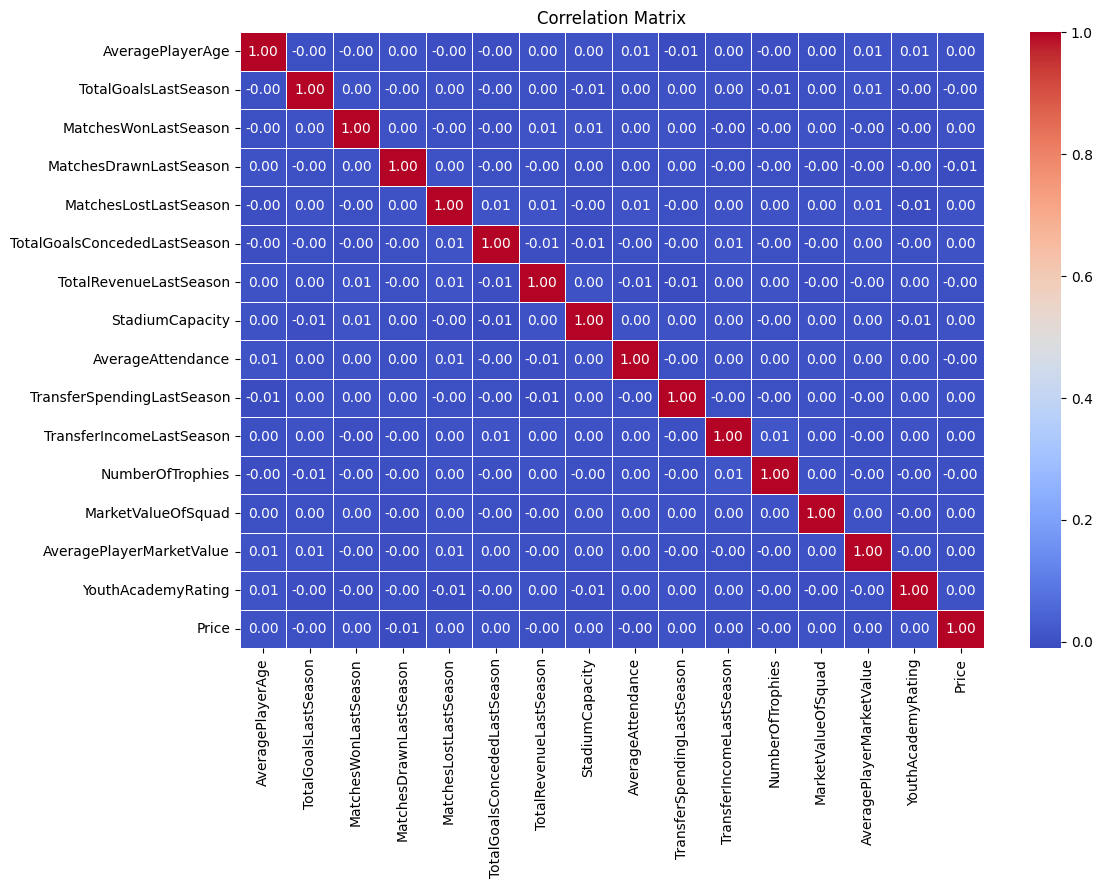

In [ ]:
# Step 7: Feature Selection
# Step 1: Calculate the correlation matrix for the features
correlation_matrix = data_capped.corr()

# Step 2: Plot the correlation matrix for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Step 3: Identify pairs of features with correlation > 0.9
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Step 4: Remove one feature from each pair of highly correlated features
data_filtered = data_capped.drop(columns=highly_correlated_features)

# Step 5: Display the remaining features after dropping highly correlated ones
print("Remaining features after removing highly correlated ones:")
data_filtered.columns

Remaining features after removing highly correlated ones:


Index(['AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason',
       'MatchesDrawnLastSeason', 'MatchesLostLastSeason',
       'TotalGoalsConcededLastSeason', 'TotalRevenueLastSeason',
       'StadiumCapacity', 'AverageAttendance', 'TransferSpendingLastSeason',
       'TransferIncomeLastSeason', 'NumberOfTrophies', 'MarketValueOfSquad',
       'AveragePlayerMarketValue', 'YouthAcademyRating', 'Price'],
      dtype='object')

In [ ]:
# Verify the shape after Feature Selection for numerical features
print("Shape of dataset after capping outliers:", data_filtered.shape)

Shape of dataset after capping outliers: (50000, 16)


In [ ]:
# Step 6: Feature Scaling for numerical features (Standardization)
scaler = StandardScaler()

# Fit and transform on the training data
X_scaled = scaler.fit_transform(data_filtered)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=data_filtered.columns)

# Display the first few rows after scaling
print("First few rows after scaling:\n")
X_scaled_df.head()

First few rows after scaling:



,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,Price
0,-0.431074,-1.357111,-0.221395,1.584271,0.138395,-0.370449,0.484410,0.035074,-1.716775,1.348217,-0.354703,1.692430,0.729089,-0.657529,-1.236290,1.245631
1,1.566732,1.284096,-0.586514,1.493198,1.138686,1.061249,-0.074192,-1.521875,-0.050962,0.443872,-1.609594,0.929929,-0.937124,0.103682,-0.903071,-1.449999
2,0.808348,-0.707634,-1.408032,-0.874711,0.865879,0.540632,0.683191,0.854127,1.257566,-0.972309,0.629097,0.929929,-0.330234,-0.271650,0.496387,-0.446133
3,0.346026,1.067604,0.052444,0.036023,1.411492,-1.628608,0.170678,0.253421,0.514888,1.458235,1.185161,-1.288255,-1.143367,-0.263373,1.122260,-1.015429
4,-1.188768,-1.010723,1.604200,-0.783638,-0.861896,0.887710,1.586042,0.912351,-1.484408,-1.473376,1.533801,-0.941663,0.199004,0.118140,1.408874,0.987166


In [ ]:
# All the columns that are in X_scaled_df
print("Columns in X_scaled_df:", X_scaled_df.columns)

Columns in X_scaled_df: Index(['AveragePlayerAge', 'TotalGoalsLastSeason', 'MatchesWonLastSeason',
       'MatchesDrawnLastSeason', 'MatchesLostLastSeason',
       'TotalGoalsConcededLastSeason', 'TotalRevenueLastSeason',
       'StadiumCapacity', 'AverageAttendance', 'TransferSpendingLastSeason',
       'TransferIncomeLastSeason', 'NumberOfTrophies', 'MarketValueOfSquad',
       'AveragePlayerMarketValue', 'YouthAcademyRating', 'Price'],
      dtype='object')


In [ ]:
# Combine the scaled numerical features with the categorical features that dropped before
final_data = pd.concat([categorical_features, X_scaled_df], axis=1)

# Display the final dataset after combining
print("Combined dataset with scaled numerical features and categorical features:\n")
final_data.head()

Combined dataset with scaled numerical features and categorical features:



,cat__League_Bundesliga,cat__League_La Liga,cat__League_Ligue 1,cat__League_Premier League,cat__League_Serie A,cat__Country_England,cat__Country_France,cat__Country_Germany,cat__Country_Italy,cat__Country_Spain,...,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,Price
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.484410,0.035074,-1.716775,1.348217,-0.354703,1.692430,0.729089,-0.657529,-1.236290,1.245631
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.074192,-1.521875,-0.050962,0.443872,-1.609594,0.929929,-0.937124,0.103682,-0.903071,-1.449999
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.683191,0.854127,1.257566,-0.972309,0.629097,0.929929,-0.330234,-0.271650,0.496387,-0.446133
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.170678,0.253421,0.514888,1.458235,1.185161,-1.288255,-1.143367,-0.263373,1.122260,-1.015429
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.586042,0.912351,-1.484408,-1.473376,1.533801,-0.941663,0.199004,0.118140,1.408874,0.987166


In [ ]:
# Step 6: Train-Test Split
# Define features (X) and target variable (y)
X = final_data.drop(columns=['Price'])  # Features (all columns except 'Price')
y = final_data['Price']  # Target variable ('Price')

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (40000, 58)
Testing set shape: (10000, 58)


In [ ]:
# All the columns that are in final_data
print("Remaining features after removing highly correlated ones:", final_data.columns)

Remaining features after removing highly correlated ones: Index(['cat__League_Bundesliga', 'cat__League_La Liga', 'cat__League_Ligue 1',
       'cat__League_Premier League', 'cat__League_Serie A',
       'cat__Country_England', 'cat__Country_France', 'cat__Country_Germany',
       'cat__Country_Italy', 'cat__Country_Spain', 'cat__Manager_Manager A',
       'cat__Manager_Manager B', 'cat__Manager_Manager C',
       'cat__Manager_Manager D', 'cat__TeamFormation_3-4-3',
       'cat__TeamFormation_3-5-2', 'cat__TeamFormation_4-2-3-1',
       'cat__TeamFormation_4-3-3', 'cat__TeamFormation_4-4-2',
       'cat__PlayingStyle_Attacking', 'cat__PlayingStyle_Counter-Attack',
       'cat__PlayingStyle_Defensive', 'cat__PlayingStyle_Possession',
       'cat__HomeCity_City A', 'cat__HomeCity_City B', 'cat__HomeCity_City C',
       'cat__HomeCity_City D', 'cat__HomeCity_City E',
       'cat__StadiumType_Classic', 'cat__StadiumType_Historical',
       'cat__StadiumType_Modern', 'cat__StadiumType_Mult

In [ ]:
## Model Training Steps

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib
import matplotlib.pyplot as plt

In [ ]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_linear = linear_model.predict(X_test)

In [ ]:
# Evaluate Linear Regression
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(linear_mse)
print(f"Linear Regression - R2: {linear_r2}, MSE: {linear_mse}, MAE: {linear_mae}, RMSE: {linear_rmse}")

Linear Regression - R2: -0.0005105335744193251, MSE: 1.0013912321286844, MAE: 0.8669516683344757, RMSE: 1.0006953742916396


In [ ]:
# Cross-validate Linear Regression
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
print("Linear Regression CV R2 Scores:", cv_scores)
print("Mean R2 from Cross-Validation:", cv_scores.mean())

Linear Regression CV R2 Scores: [-0.00073038 -0.00125883 -0.00276462 -0.00149253 -0.00233656]
Mean R2 from Cross-Validation: -0.0017165842010347988


In [ ]:
# 2. Ridge Regression (with Scaling)
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

# Evaluate Ridge Regression
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
print(f"Ridge Regression - R2: {ridge_r2}, MSE: {ridge_mse}, MAE: {ridge_mae}, RMSE: {ridge_rmse}")

Ridge Regression - R2: -0.0006806202062790145, MSE: 1.0015614684791585, MAE: 0.8669720453467656, RMSE: 1.0007804297043175


In [ ]:
# 3. Lasso Regression (with Scaling)
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluate Lasso Regression
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
print(f"Lasso Regression - R2: {lasso_r2}, MSE: {lasso_mse}, MAE: {lasso_mae}, RMSE: {lasso_rmse}")

Lasso Regression - R2: -2.037923779640849e-05, MSE: 1.0009006463341197, MAE: 0.8668664791287422, RMSE: 1.0004502218172175


In [ ]:
# 4. Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Random Forest
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest - R2: {rf_r2}, MSE: {rf_mse}, MAE: {rf_mae}, RMSE: {rf_rmse}")

Random Forest - R2: -0.01158970644834234, MSE: 1.0124801574351958, MAE: 0.8689570470494841, RMSE: 1.0062207299768753


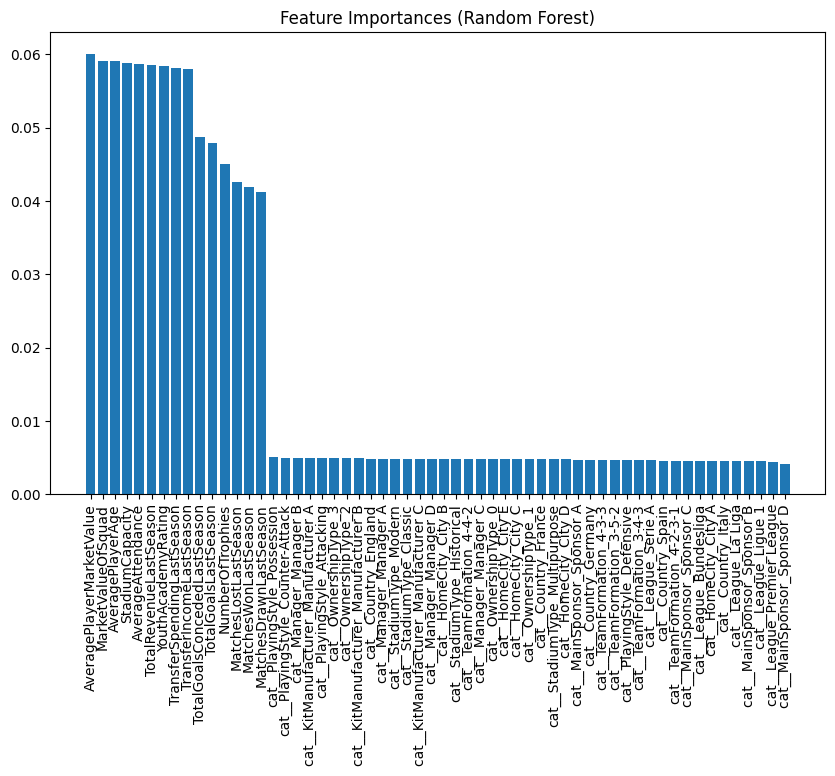

In [ ]:
# Feature Importance (Random Forest) Contribution of each feature
feature_importances = random_forest_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()

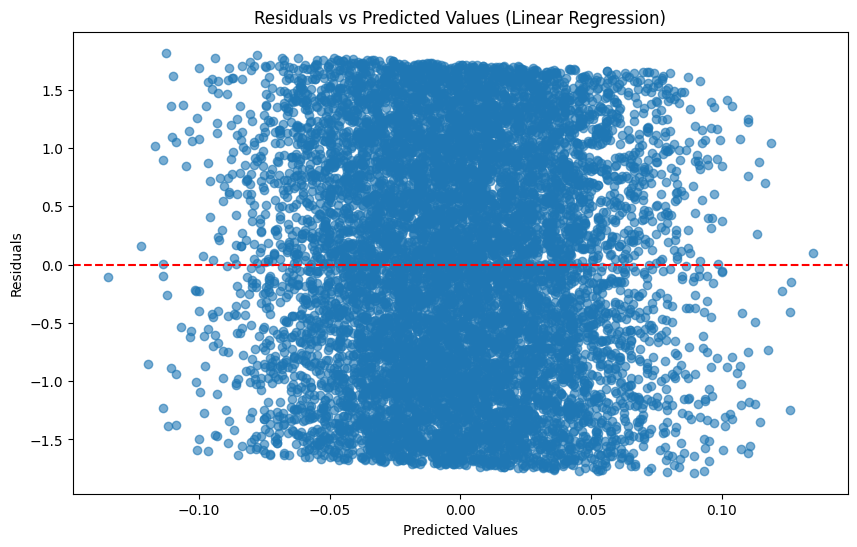

In [ ]:
# Residual Analysis for Linear Regression
residuals = y_test - y_pred_linear
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values (Linear Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

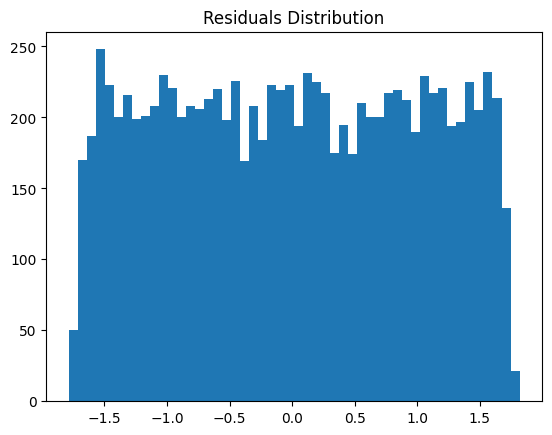

In [ ]:
# Residuals Distribution
plt.hist(residuals, bins=50)
plt.title("Residuals Distribution")
plt.show()

In [ ]:
# 6. Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate Gradient Boosting
gbr_r2 = r2_score(y_test, y_pred_gbr)
gbr_mse = mean_squared_error(y_test, y_pred_gbr)
gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
gbr_rmse = np.sqrt(gbr_mse)
print(f"Gradient Boosting - R2: {gbr_r2}, MSE: {gbr_mse}, MAE: {gbr_mae}, RMSE: {gbr_rmse}")

Gradient Boosting - R2: -0.0017733363733527518, MSE: 1.0026551465087177, MAE: 0.8672871459149998, RMSE: 1.0013266931969393


In [ ]:
# Model Performance Summary
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest", "Gradient Boosting"],
    "R2": [linear_r2, ridge_r2, lasso_r2, rf_r2, gbr_r2],
    "MSE": [linear_mse, ridge_mse, lasso_mse, rf_mse, gbr_mse],
    "MAE": [linear_mae, ridge_mae, lasso_mae, rf_mae, gbr_mae],
    "RMSE": [linear_rmse, ridge_rmse, lasso_rmse, rf_rmse, gbr_rmse]
})
results

,Model,R2,MSE,MAE,RMSE
0,Linear Regression,-0.000511,1.001391,0.866952,1.000695
1,Ridge Regression,-0.000681,1.001561,0.866972,1.000780
2,Lasso Regression,-0.000020,1.000901,0.866866,1.000450
3,Random Forest,-0.011590,1.012480,0.868957,1.006221
4,Gradient Boosting,-0.001773,1.002655,0.867287,1.001327


**Model Evaluation and Discussions**

The models were evaluated using metrics like R2, Mean sqauared Error and Mean Absolute Error:


*   Linear Regression: Achived an R2 close to 0, indicating limitations in capturing the target's variance.
*   Ridge and Lasso Regression: Marginally improved performance due to regularization.

*   Random Forest: Captured non-linear relationships but slightly overfited.
*   Gradient Boosting: Performed consistenly across metrics, suggesting its suitability for this task.





**Conclusion**

This project successfully demonstrated the use of machine learning techniques for football team price prediction. While the initial models showed room for improvement, the insights from the dataset and feature engineering highlight the potential for future work. Fine-tuning hyperparameters, exploring advanced techniques like deep learning and integrating external data sources could further enhance prediction accuracy. This work lays the foundation for more sophisticated analyses in sports econimics.